In [ ]:
# importing basis dependancies
import tensorflow as tf
import numpy as np
# import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
# import pandas as pd
import os

2025-04-29 18:49:53.565387: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-29 18:49:53.758088: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-29 18:49:53.937851: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745941794.104322   18033 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745941794.167953   18033 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-29 18:49:54.596398: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [7]:
# path to image dataset
dataset_dir = "/home/comphortine/Comphortine/Dermatology Assistant/testing/Skin Diseases Dataset"  

In [8]:
# Data cleaning
def load_image(file_path):
    try:
        image = tf.io.read_file(file_path)
        tf.image.decode_image(image) 
        return True 
    except Exception as e:
        print(f"Error loading image {file_path}: {e}")
        return False 

def clean_dataset(directory):
    corrupted_files = []

    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            if not load_image(file_path):
                corrupted_files.append(file_path)

    # Delete corrupted files
    for file_path in corrupted_files:
        print(f"Deleting corrupted file: {file_path}")
        os.remove(file_path)

    print(f"Deleted {len(corrupted_files)} corrupted images.")

# Run the cleaning function
clean_dataset(dataset_dir)


2025-04-29 18:55:27.701026: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-04-29 18:55:29.377234: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


Error loading image /home/comphortine/Comphortine/Dermatology Assistant/testing/Skin Diseases Dataset/train/warts/verrues-sur-les-mains-comment-s-en-debarrasser.jpg: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage] name: 


2025-04-29 18:55:30.447314: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: INVALID_ARGUMENT: Unknown image file format. One of JPEG, PNG, GIF, BMP required.


Error loading image /home/comphortine/Comphortine/Dermatology Assistant/testing/Skin Diseases Dataset/train/acne/laserskin-acne-scarring-hero.jpg: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage] name: 


2025-04-29 18:55:31.653687: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: INVALID_ARGUMENT: Unknown image file format. One of JPEG, PNG, GIF, BMP required.


Error loading image /home/comphortine/Comphortine/Dermatology Assistant/testing/Skin Diseases Dataset/train/shingles/shingles.jpg: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage] name: 
Deleting corrupted file: /home/comphortine/Comphortine/Dermatology Assistant/testing/Skin Diseases Dataset/train/warts/verrues-sur-les-mains-comment-s-en-debarrasser.jpg
Deleting corrupted file: /home/comphortine/Comphortine/Dermatology Assistant/testing/Skin Diseases Dataset/train/acne/laserskin-acne-scarring-hero.jpg
Deleting corrupted file: /home/comphortine/Comphortine/Dermatology Assistant/testing/Skin Diseases Dataset/train/shingles/shingles.jpg
Deleted 3 corrupted images.


In [9]:
data_train_path = "/home/comphortine/Comphortine/Dermatology Assistant/testing/Skin Diseases Dataset/train" 
data_val_path = "/home/comphortine/Comphortine/Dermatology Assistant/testing/Skin Diseases Dataset/validation" 

In [10]:
img_width,img_height = 180,180

In [11]:
data_train = tf.keras.utils.image_dataset_from_directory( 
data_train_path, 
shuffle = True, 
image_size = (img_width,img_height), 
batch_size = 32, 
validation_split = False 
) 

Found 1961 files belonging to 7 classes.


In [12]:
data_val = tf.keras.utils.image_dataset_from_directory( 
data_val_path, 
shuffle = False, 
image_size = (img_width,img_height), 
batch_size = 32, 
validation_split = False 
) 

Found 534 files belonging to 7 classes.


In [13]:
data_cat = data_train.class_names

In [14]:
data_cat

['acne',
 'alopeciaareata',
 'cold sores',
 'ringworm',
 'shingles',
 'vitiligo',
 'warts']

In [16]:
import matplotlib.pyplot as plt

2025-04-29 18:58:15.111139: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


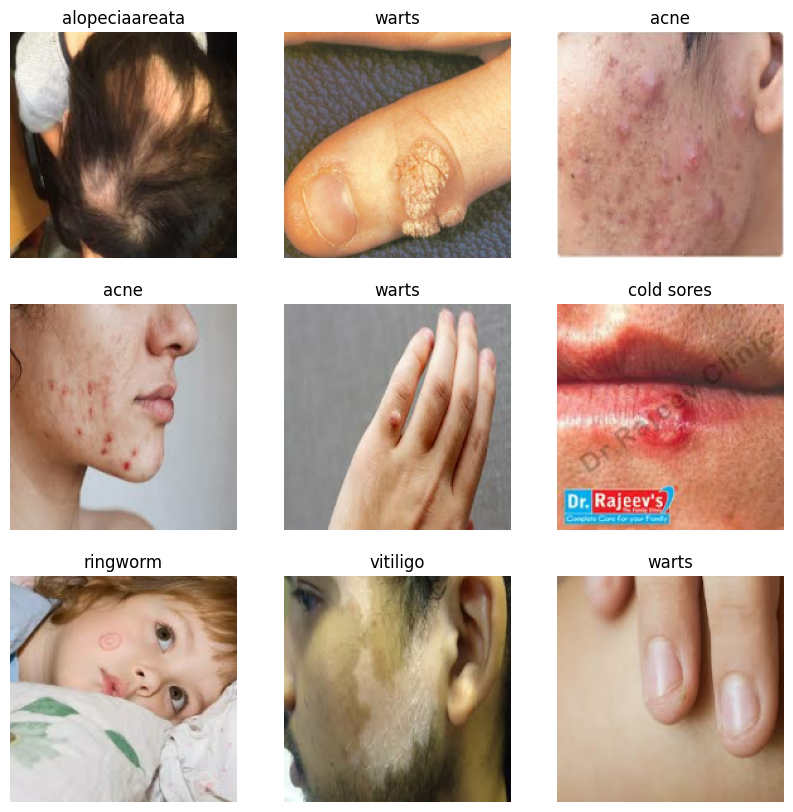

In [17]:
plt.figure(figsize=(10,10)) 
for image,label in data_train.take(1): 
    for i in range(9): 
        plt.subplot(3,3,i+1) 
        plt.imshow(image[i].numpy().astype('uint8')) 
        plt.title(data_cat[label[i]]) 
        plt.axis('off') 

In [18]:
# Modified Model Definition (Critical Fix)
model = Sequential([
    # Explicit input shape definition in first layer
    layers.Input(shape=(img_height, img_width, 3)),  # <-- This is the key fix
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu', name='conv2d_1'),
    layers.MaxPooling2D(name='max_pool1'),
    layers.Conv2D(32, 3, padding='same', activation='relu', name='conv2d_2'),
    layers.MaxPooling2D(name='max_pool2'),
    layers.Conv2D(64, 3, padding='same', activation='relu', name='conv2d_3'),
    layers.MaxPooling2D(name='max_pool3'),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [19]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics =['accuracy']) 

In [20]:
epoch_size = 30

In [21]:
history = model.fit(data_train,validation_data=data_val,epochs = epoch_size) 

Epoch 1/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 674ms/step - accuracy: 0.2113 - loss: 2.2287

2025-04-29 19:01:04.484152: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/62 ━━━━━━━━━━━━━━━━━━━━ 48s 741ms/step - accuracy: 0.2118 - loss: 2.2239 - val_accuracy: 0.2491 - val_loss: 1.8820
Epoch 2/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 869ms/step - accuracy: 0.3426 - loss: 1.6559

2025-04-29 19:02:02.300144: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/62 ━━━━━━━━━━━━━━━━━━━━ 58s 937ms/step - accuracy: 0.3427 - loss: 1.6555 - val_accuracy: 0.2584 - val_loss: 1.8200
Epoch 3/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 891ms/step - accuracy: 0.3846 - loss: 1.5548

2025-04-29 19:03:02.870704: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/62 ━━━━━━━━━━━━━━━━━━━━ 60s 959ms/step - accuracy: 0.3851 - loss: 1.5540 - val_accuracy: 0.2790 - val_loss: 1.7113
Epoch 4/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 889ms/step - accuracy: 0.4912 - loss: 1.3296

2025-04-29 19:04:01.757047: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/62 ━━━━━━━━━━━━━━━━━━━━ 59s 953ms/step - accuracy: 0.4916 - loss: 1.3286 - val_accuracy: 0.3427 - val_loss: 1.8118
Epoch 5/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 886ms/step - accuracy: 0.5952 - loss: 1.0747

2025-04-29 19:05:00.678857: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/62 ━━━━━━━━━━━━━━━━━━━━ 59s 954ms/step - accuracy: 0.5957 - loss: 1.0737 - val_accuracy: 0.4270 - val_loss: 1.7216
Epoch 6/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 887ms/step - accuracy: 0.6918 - loss: 0.8642

2025-04-29 19:06:00.129519: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/62 ━━━━━━━━━━━━━━━━━━━━ 59s 948ms/step - accuracy: 0.6921 - loss: 0.8631 - val_accuracy: 0.4644 - val_loss: 1.6622
Epoch 7/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 891ms/step - accuracy: 0.7742 - loss: 0.6378

2025-04-29 19:06:59.381203: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/62 ━━━━━━━━━━━━━━━━━━━━ 59s 955ms/step - accuracy: 0.7743 - loss: 0.6376 - val_accuracy: 0.4045 - val_loss: 2.2137
Epoch 8/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 887ms/step - accuracy: 0.8137 - loss: 0.5468

2025-04-29 19:07:58.535967: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/62 ━━━━━━━━━━━━━━━━━━━━ 59s 948ms/step - accuracy: 0.8138 - loss: 0.5468 - val_accuracy: 0.5056 - val_loss: 2.1940
Epoch 9/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 892ms/step - accuracy: 0.8548 - loss: 0.4401

2025-04-29 19:08:57.628320: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/62 ━━━━━━━━━━━━━━━━━━━━ 59s 953ms/step - accuracy: 0.8548 - loss: 0.4395 - val_accuracy: 0.5206 - val_loss: 2.3049
Epoch 10/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 877ms/step - accuracy: 0.9025 - loss: 0.2984

2025-04-29 19:09:55.873448: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/62 ━━━━━━━━━━━━━━━━━━━━ 58s 936ms/step - accuracy: 0.9025 - loss: 0.2984 - val_accuracy: 0.5056 - val_loss: 2.5640
Epoch 11/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 857ms/step - accuracy: 0.9328 - loss: 0.2136

2025-04-29 19:10:52.842724: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/62 ━━━━━━━━━━━━━━━━━━━━ 57s 918ms/step - accuracy: 0.9327 - loss: 0.2140 - val_accuracy: 0.4888 - val_loss: 2.7556
Epoch 12/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 864ms/step - accuracy: 0.9264 - loss: 0.2377

2025-04-29 19:12:15.146535: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/62 ━━━━━━━━━━━━━━━━━━━━ 82s 920ms/step - accuracy: 0.9263 - loss: 0.2380 - val_accuracy: 0.4888 - val_loss: 2.7692
Epoch 13/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 866ms/step - accuracy: 0.9315 - loss: 0.2046

2025-04-29 19:13:12.711644: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/62 ━━━━━━━━━━━━━━━━━━━━ 57s 925ms/step - accuracy: 0.9315 - loss: 0.2045 - val_accuracy: 0.5356 - val_loss: 3.0693
Epoch 14/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 846ms/step - accuracy: 0.9356 - loss: 0.1908

2025-04-29 19:14:08.642264: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/62 ━━━━━━━━━━━━━━━━━━━━ 56s 903ms/step - accuracy: 0.9355 - loss: 0.1912 - val_accuracy: 0.4869 - val_loss: 3.1753
Epoch 15/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 869ms/step - accuracy: 0.9590 - loss: 0.1470

2025-04-29 19:15:06.296006: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/62 ━━━━━━━━━━━━━━━━━━━━ 58s 926ms/step - accuracy: 0.9588 - loss: 0.1471 - val_accuracy: 0.4888 - val_loss: 3.4550
Epoch 16/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 850ms/step - accuracy: 0.9430 - loss: 0.1776

2025-04-29 19:16:02.558753: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/62 ━━━━━━━━━━━━━━━━━━━━ 56s 909ms/step - accuracy: 0.9430 - loss: 0.1776 - val_accuracy: 0.4813 - val_loss: 3.8150
Epoch 17/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 869ms/step - accuracy: 0.9596 - loss: 0.1464

2025-04-29 19:17:00.419252: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/62 ━━━━━━━━━━━━━━━━━━━━ 58s 929ms/step - accuracy: 0.9596 - loss: 0.1463 - val_accuracy: 0.5075 - val_loss: 4.0925
Epoch 18/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 860ms/step - accuracy: 0.9703 - loss: 0.1210

2025-04-29 19:17:57.433373: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/62 ━━━━━━━━━━━━━━━━━━━━ 57s 919ms/step - accuracy: 0.9703 - loss: 0.1208 - val_accuracy: 0.5150 - val_loss: 3.8571
Epoch 19/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 851ms/step - accuracy: 0.9804 - loss: 0.0731

2025-04-29 19:18:54.382170: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/62 ━━━━━━━━━━━━━━━━━━━━ 57s 912ms/step - accuracy: 0.9803 - loss: 0.0733 - val_accuracy: 0.5037 - val_loss: 4.3976
Epoch 20/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 860ms/step - accuracy: 0.9606 - loss: 0.1221

2025-04-29 19:19:51.339009: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/62 ━━━━━━━━━━━━━━━━━━━━ 57s 917ms/step - accuracy: 0.9606 - loss: 0.1224 - val_accuracy: 0.5243 - val_loss: 4.3002
Epoch 21/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 845ms/step - accuracy: 0.9625 - loss: 0.1235

2025-04-29 19:20:47.632273: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/62 ━━━━━━━━━━━━━━━━━━━━ 56s 904ms/step - accuracy: 0.9625 - loss: 0.1236 - val_accuracy: 0.5150 - val_loss: 4.7960
Epoch 22/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 865ms/step - accuracy: 0.9374 - loss: 0.1908

2025-04-29 19:21:44.893749: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/62 ━━━━━━━━━━━━━━━━━━━━ 58s 926ms/step - accuracy: 0.9376 - loss: 0.1904 - val_accuracy: 0.4831 - val_loss: 4.6070
Epoch 23/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 858ms/step - accuracy: 0.9787 - loss: 0.0787

2025-04-29 19:22:42.290749: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/62 ━━━━━━━━━━━━━━━━━━━━ 57s 917ms/step - accuracy: 0.9788 - loss: 0.0786 - val_accuracy: 0.5150 - val_loss: 4.8360
Epoch 24/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 860ms/step - accuracy: 0.9788 - loss: 0.0882

2025-04-29 19:23:39.321105: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/62 ━━━━━━━━━━━━━━━━━━━━ 57s 919ms/step - accuracy: 0.9788 - loss: 0.0882 - val_accuracy: 0.4925 - val_loss: 4.8538
Epoch 25/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 848ms/step - accuracy: 0.9636 - loss: 0.1249

2025-04-29 19:24:35.769678: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/62 ━━━━━━━━━━━━━━━━━━━━ 56s 908ms/step - accuracy: 0.9636 - loss: 0.1252 - val_accuracy: 0.5112 - val_loss: 4.2653
Epoch 26/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 864ms/step - accuracy: 0.9782 - loss: 0.1241

2025-04-29 19:25:33.420587: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/62 ━━━━━━━━━━━━━━━━━━━━ 57s 924ms/step - accuracy: 0.9783 - loss: 0.1232 - val_accuracy: 0.5019 - val_loss: 5.0158
Epoch 27/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 877ms/step - accuracy: 0.9822 - loss: 0.0654

2025-04-29 19:26:31.722257: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/62 ━━━━━━━━━━━━━━━━━━━━ 58s 935ms/step - accuracy: 0.9821 - loss: 0.0656 - val_accuracy: 0.4963 - val_loss: 4.8286
Epoch 28/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 854ms/step - accuracy: 0.9857 - loss: 0.0529

2025-04-29 19:27:28.237963: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/62 ━━━━━━━━━━━━━━━━━━━━ 56s 912ms/step - accuracy: 0.9858 - loss: 0.0528 - val_accuracy: 0.5094 - val_loss: 5.2333
Epoch 29/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 847ms/step - accuracy: 0.9816 - loss: 0.0724

2025-04-29 19:28:24.285955: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/62 ━━━━━━━━━━━━━━━━━━━━ 56s 906ms/step - accuracy: 0.9815 - loss: 0.0729 - val_accuracy: 0.5037 - val_loss: 5.2269
Epoch 30/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 847ms/step - accuracy: 0.9747 - loss: 0.0952

2025-04-29 19:29:20.568271: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


62/62 ━━━━━━━━━━━━━━━━━━━━ 56s 906ms/step - accuracy: 0.9747 - loss: 0.0953 - val_accuracy: 0.4981 - val_loss: 5.3004


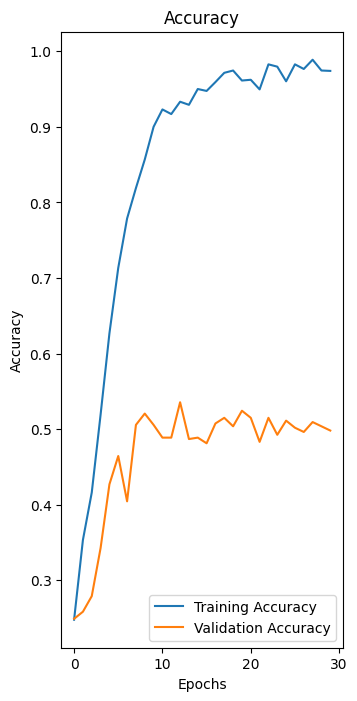

In [24]:
epoch_range = range(epoch_size)
plt.figure(figsize=(8, 8))  # Corrected parameter here
plt.subplot(1, 2, 1)
plt.plot(epoch_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epoch_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

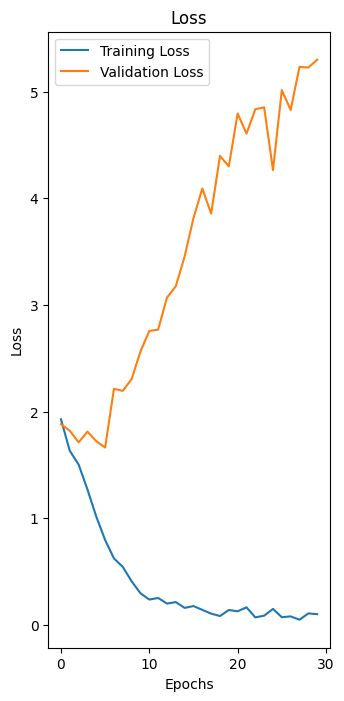

In [25]:
epoch_range = range(epoch_size)
plt.figure(figsize=(8, 8))  # Corrected parameter here
plt.subplot(1, 2, 2)
plt.plot(epoch_range, history.history['loss'], label='Training Loss')
plt.plot(epoch_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool1 (MaxPooling2D)        │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool2 (MaxPooling2D)        │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool3 (MaxPooling2D)        │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,968,631 (45.66 MB)

 Trainable params: 3,989,543 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,979,088 (30.44 MB)

In [29]:
image_path="/home/comphortine/Comphortine/Dermatology Assistant/testing/test.jpeg"

In [30]:
# Fix your prediction code:
image = tf.keras.utils.load_img(
    image_path,
    target_size=(img_height, img_width),
    color_mode='rgb'  # Explicit color mode
)
image_arr = tf.keras.utils.img_to_array(image)  # Not array_to_img
image_bat = tf.expand_dims(image_arr, 0) / 255.0 

In [31]:
# predicting
predict = model.predict(image_bat)
score = tf.nn.softmax(predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


In [32]:
print("Disease in image is {} with an accuracy of {:.2f}%".format(data_cat[np.argmax(score)], np.max(score) * 100))

Disease in image is ringworm with an accuracy of 65.79%


In [33]:
# Add this before saving:
model.save('SD_Classification.keras', save_format='keras')

In [46]:
loaded_model = tf.keras.models.load_model('SD_Classification.keras',compile=False)
print(loaded_model.layers[0].input) 

<KerasTensor shape=(None, 180, 180, 3), dtype=float32, sparse=False, ragged=False, name=input_layer>


In [47]:
print("Input shape verification:", model.layers[0].input) 

Input shape verification: <KerasTensor shape=(None, 180, 180, 3), dtype=float32, sparse=False, ragged=False, name=input_layer>


In [58]:
import cv2
from PIL import Image
import numpy as np
from tqdm import tqdm

In [49]:
# Load the trained model
model = tf.keras.models.load_model('SD_Classification.keras',compile=False)

In [59]:
class ScoreCAM:
    def __init__(self, model, target_size=(180, 180)):
        self.model = model
        self.target_size = target_size
        
        # Find the last convolutional layer automatically
        self.conv_layer = None
        for layer in reversed(model.layers):
            if isinstance(layer, (tf.keras.layers.Conv2D, 
                              tf.keras.layers.SeparableConv2D)):
                self.conv_layer = layer
                break
        
        if not self.conv_layer:
            raise ValueError("No convolutional layer found in model")
        
        # Create feature extractor
        self.feature_extractor = tf.keras.models.Model(
            inputs=model.inputs,
            outputs=self.conv_layer.output
        )
    
    def _normalize(self, x):
        """Normalize to 0-1 range"""
        x = x - x.min()
        return x / (x.max() + 1e-8)
    
    def generate_heatmap(self, img_array, n_samples=32):
        """Generate Score-CAM heatmap without gradient computation"""
        # Get feature maps
        img_batch = np.expand_dims(img_array, axis=0)
        features = self.feature_extractor.predict(img_batch, verbose=0)[0]
        
        # Process each feature map
        weights = []
        for i in tqdm(range(min(n_samples, features.shape[-1])), 
                     desc="Processing features"):
            # Create mask from feature map
            mask = self._normalize(features[:, :, i])
            mask = cv2.resize(mask, self.target_size)
            mask = np.expand_dims(mask, axis=-1)
            
            # Apply mask to original image
            masked_img = img_array * mask
            
            # Get prediction score
            pred = self.model.predict(np.expand_dims(masked_img, axis=0), verbose=0)
            weights.append(pred[0].max())
        
        # Generate heatmap
        heatmap = np.zeros(features.shape[:2])
        for i, w in enumerate(weights[:features.shape[-1]]):
            heatmap += w * self._normalize(features[:, :, i])
        
        return self._normalize(heatmap)

def visualize_scorecam(image_path, model):
    """Complete visualization pipeline"""
    # Load and preprocess image
    img = Image.open(image_path).convert('RGB').resize((180, 180))
    img_array = tf.keras.utils.img_to_array(img) / 255.0
    
    # Initialize Score-CAM
    explainer = ScoreCAM(model)
    
    # Generate heatmap
    heatmap = explainer.generate_heatmap(img_array)
    
    # Convert to color heatmap
    heatmap = cv2.resize(heatmap, (img.width, img.height))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    
    # Superimpose on original image
    img_cv = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    superimposed = cv2.addWeighted(img_cv, 0.6, heatmap_colored, 0.4, 0)
    
    # Visualize
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    
    ax1.imshow(img)
    ax1.set_title("Original Image")
    ax1.axis('off')
    
    ax2.imshow(heatmap, cmap='jet')
    ax2.set_title("Score-CAM Heatmap")
    ax2.axis('off')
    
    ax3.imshow(cv2.cvtColor(superimposed, cv2.COLOR_BGR2RGB))
    ax3.set_title("Activation Overlay")
    ax3.axis('off')
    
    plt.tight_layout()
    plt.show()

In [60]:
model = tf.keras.models.load_model('SD_Classification.keras', compile=False)

/home/comphortine/Comphortine/Dermatology Assistant/venv/lib/python3.11/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(1, 180, 180, 3))
  warnings.warn(msg)
Processing features:   0%|          | 0/32 [00:00<?, ?it/s]

Processing features: 100%|██████████| 32/32 [00:05<00:00,  6.07it/s]


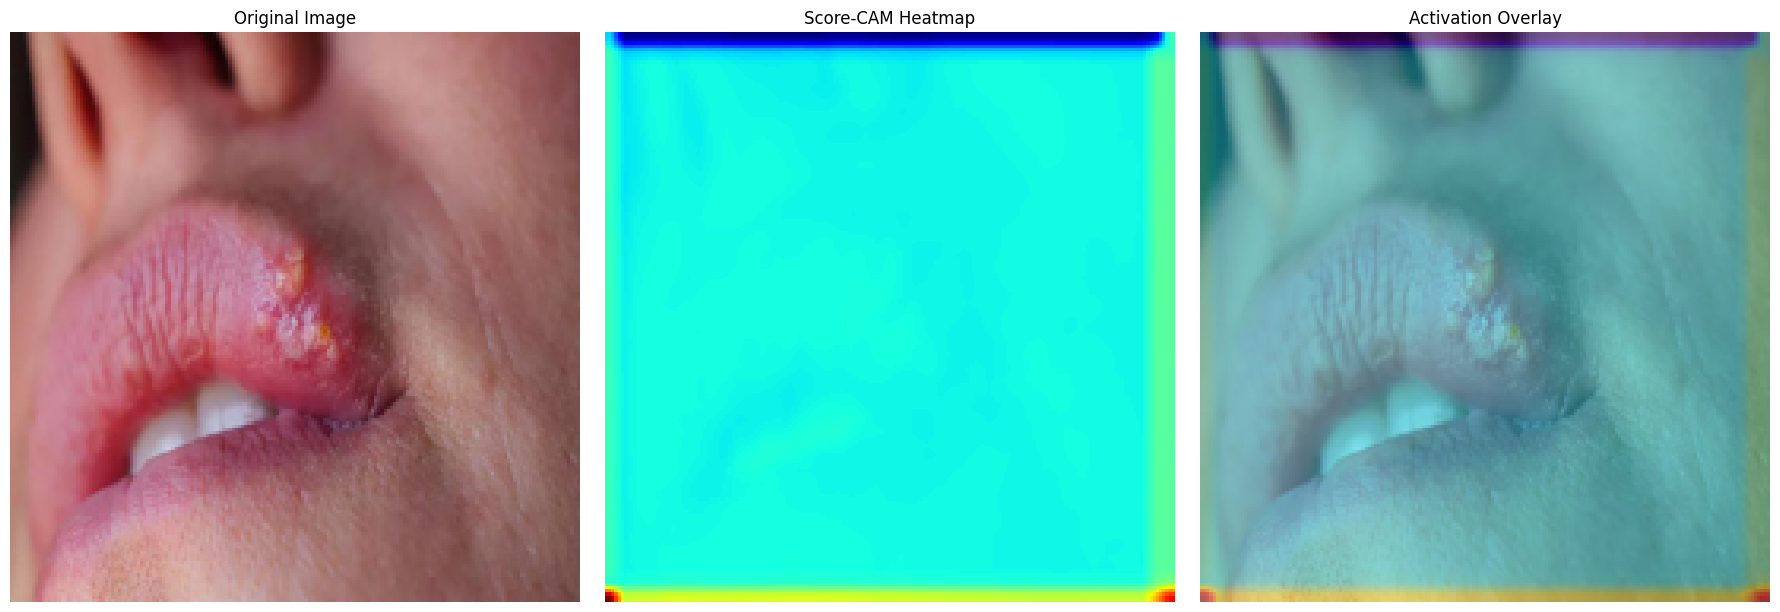

In [61]:
test_image_path = "/home/comphortine/Comphortine/Dermatology Assistant/testing/test.jpeg"
visualize_scorecam(test_image_path, model)

In [66]:
class GuidedBackprop:
    def __init__(self, model, input_size=(180, 180, 3)):
        self.model = model
        self.input_size = input_size
        
        # Custom gradient function for guided ReLU
        @tf.custom_gradient
        def guided_relu(x):
            def grad(dy):
                return tf.cast(dy > 0, tf.float32) * tf.cast(x > 0, tf.float32) * dy
            return tf.nn.relu(x), grad
        
        # Replace all ReLU activations with guided ReLU
        self.guided_model = tf.keras.models.clone_model(model)
        self.guided_model.build((None, *input_size))
        
        for layer in self.guided_model.layers:
            if hasattr(layer, 'activation') and layer.activation == tf.keras.activations.relu:
                layer.activation = guided_relu
        
        # Force model initialization
        _ = self.guided_model.predict(np.zeros((1, *input_size)))

    def generate_visualization(self, image_path):
        # Load and preprocess image
        img = Image.open(image_path).convert('RGB').resize(self.input_size[:2])
        img_array = tf.keras.utils.img_to_array(img) / 255.0
        
        # Convert to TensorFlow tensor explicitly
        img_tensor = tf.convert_to_tensor(img_array, dtype=tf.float32)
        img_batch = tf.expand_dims(img_tensor, axis=0)
        
        # Compute guided backpropagation
        with tf.GradientTape() as tape:
            tape.watch(img_batch)
            predictions = self.guided_model(img_batch)
            pred_class = tf.argmax(predictions[0])
            loss = predictions[:, pred_class]
        
        grads = tape.gradient(loss, img_batch)[0]
        guided_grads = np.clip(grads.numpy(), 0, 1)  # Convert back to numpy for visualization
        
        # Normalize and convert to heatmap
        vis = self._normalize(guided_grads)
        heatmap = cv2.applyColorMap(np.uint8(255 * vis), cv2.COLORMAP_JET)
        
        # Visualize results
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
        
        ax1.imshow(img)
        ax1.set_title("Original Image")
        ax1.axis('off')
        
        ax2.imshow(vis, cmap='hot')
        ax2.set_title("Guided Backprop")
        ax2.axis('off')
        
        superimposed = cv2.addWeighted(
            cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR), 
            0.6, 
            heatmap, 
            0.4, 
            0
        )
        ax3.imshow(cv2.cvtColor(superimposed, cv2.COLOR_BGR2RGB))
        ax3.set_title("Superimposed")
        ax3.axis('off')
        
        plt.tight_layout()
        plt.show()
        
        return vis

    def _normalize(self, x):
        """Normalize to 0-1 range"""
        x = x - x.min()
        return x / (x.max() + 1e-8)



In [67]:
model = tf.keras.models.load_model('SD_Classification.keras', compile=False)

In [68]:
visualizer = GuidedBackprop(model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


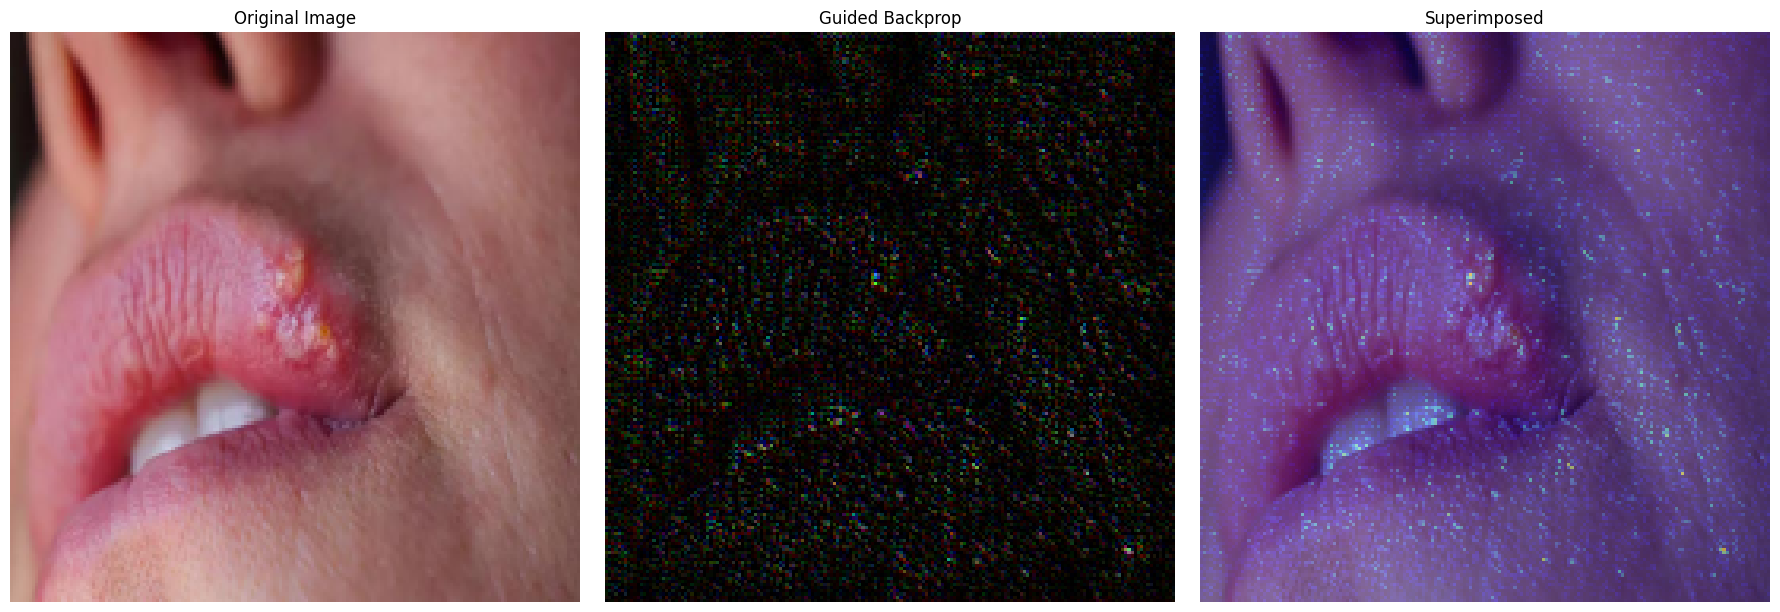

In [69]:
visualization = visualizer.generate_visualization("/home/comphortine/Comphortine/Dermatology Assistant/testing/test.jpeg")

In [161]:

# Load model and rebuild if necessary
original_model = tf.keras.models.load_model("SD_Classification.keras", compile=False)

In [153]:
# Rebuild the model with defined input/output if Sequential
if isinstance(model, tf.keras.Sequential):
    inputs = tf.keras.Input(shape=(180, 180, 3))
    x = inputs
    for layer in model.layers:
        x = layer(x)
    model = tf.keras.Model(inputs, x)


In [154]:
# Specify the last conv layer
last_conv_layer_name = "conv2d_3" 

In [160]:
# Create Grad-CAM model
grad_model = Model(
    inputs=model.inputs,
    outputs=[model.get_layer("conv2d_3").output, model.output]
)

In [156]:
def get_img_array(img_path, size=(180, 180)):
    img = tf.keras.utils.load_img(img_path, target_size=size)
    array = tf.keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    array = array / 255.0
    return array, img

In [157]:
def make_gradcam_heatmap(img_array, model, class_index=None):
    conv_outputs, predictions = grad_model(img_array)
    
    if class_index is None:
        class_index = tf.argmax(predictions[0])
    
    # Gradient of the class output wrt conv feature map
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, class_index]
    
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize heatmap
    heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap)
    return heatmap.numpy()

In [158]:
def display_gradcam(img, heatmap, alpha=0.4):
    # Resize heatmap to match image
    heatmap = cv2.resize(heatmap, (img.size[0], img.size[1]))
    heatmap = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    img_bgr = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

    overlay = cv2.addWeighted(img_bgr, 1 - alpha, heatmap_color, alpha, 0)
    overlay = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)

    # Plot
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(heatmap, cmap='jet')
    plt.title("Grad-CAM Heatmap")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(overlay)
    plt.title("Overlay")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

In [159]:
# Run Grad-CAM
image_path = "/home/comphortine/Comphortine/Dermatology Assistant/testing/test.jpeg"
img_array, img_pil = get_img_array(image_path)
heatmap = make_gradcam_heatmap(img_array, grad_model)
display_gradcam(img_pil, heatmap)

/home/comphortine/Comphortine/Dermatology Assistant/venv/lib/python3.11/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_1497']]
Received: inputs=Tensor(shape=(1, 180, 180, 3))
  warnings.warn(msg)


KeyError: 'Exception encountered when calling Functional.call().\n\n\x1b[1m139791491574224\x1b[0m\n\nArguments received by Functional.call():\n  • inputs=array([[[[0.1254902 , 0.07843138, 0.07843138],\n         [0.1254902 , 0.07843138, 0.07843138],\n         [0.12156863, 0.07450981, 0.07450981],\n         ...,\n         [0.49411765, 0.27450982, 0.2784314 ],\n         [0.47843137, 0.25882354, 0.2627451 ],\n         [0.46666667, 0.24705882, 0.2509804 ]],\n\n        [[0.1254902 , 0.07843138, 0.07843138],\n         [0.1254902 , 0.07843138, 0.07843138],\n         [0.12156863, 0.07450981, 0.07450981],\n         ...,\n         [0.47843137, 0.25882354, 0.2627451 ],\n         [0.47058824, 0.2509804 , 0.25490198],\n         [0.46666667, 0.24705882, 0.2509804 ]],\n\n        [[0.1254902 , 0.07843138, 0.07843138],\n         [0.1254902 , 0.07843138, 0.07843138],\n         [0.12156863, 0.07450981, 0.07450981],\n         ...,\n         [0.46666667, 0.24705882, 0.2509804 ],\n         [0.4627451 , 0.24313726, 0.24705882],\n         [0.4627451 , 0.24313726, 0.24705882]],\n\n        ...,\n\n        [[0.7647059 , 0.6117647 , 0.54509807],\n         [0.7764706 , 0.62352943, 0.5568628 ],\n         [0.78039217, 0.627451  , 0.56078434],\n         ...,\n         [0.4392157 , 0.29411766, 0.27058825],\n         [0.44313726, 0.30588236, 0.28235295],\n         [0.45490196, 0.31764707, 0.29411766]],\n\n        [[0.76862746, 0.6156863 , 0.54901963],\n         [0.78039217, 0.627451  , 0.56078434],\n         [0.7882353 , 0.63529414, 0.5686275 ],\n         ...,\n         [0.42745098, 0.28235295, 0.25882354],\n         [0.4392157 , 0.3019608 , 0.2784314 ],\n         [0.44705883, 0.30980393, 0.28627452]],\n\n        [[0.77254903, 0.61960787, 0.5529412 ],\n         [0.78431374, 0.6313726 , 0.5647059 ],\n         [0.7882353 , 0.63529414, 0.5686275 ],\n         ...,\n         [0.41960785, 0.27450982, 0.2509804 ],\n         [0.4392157 , 0.3019608 , 0.2784314 ],\n         [0.44705883, 0.30980393, 0.28627452]]]], dtype=float32)\n  • training=None\n  • mask=None'